# Install necessary packages

In [3]:
!pip install numpy matplotlib tensorflow opencv-python

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model 

# Paths

In [6]:
train_dir = 'C:\\Users\\ayush\\Desktop\\plant_recognition\\plant-disease-classification\\training\\dataset_type_of_plants\\Train_Set_Folder'
val_dir = 'C:\\Users\\ayush\\Desktop\\plant_recognition\\plant-disease-classification\\training\\dataset_type_of_plants\\Validation_Set_Folder'
test_image_path = 'C:\\Users\\ayush\\Desktop\\plant_recognition\\plant-disease-classification\\training\\dataset_type_of_plants\\Test_Set_Folder\\mango\\aug_0_262.jpg'
model_path = 'plant_recognition_model_v2_2.keras'

# Hyperparameters

In [8]:
IMAGE_SIZE = 128  # Input size for the model
CHANNELS = 3
BATCH_SIZE = 32
EPOCHS = 20  # Adjust based on your dataset
n_classes = 30  # Adjust based on the number of classes in your dataset

# Check if the model already exists


In [10]:
if os.path.exists(model_path):
    print("Loading saved model...")
    model = load_model(model_path)
else:
    print("Training new model...")


Loading saved model...


# Data generators with augmentation

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 23972 images belonging to 30 classes.
Found 3030 images belonging to 30 classes.


# Model Architecture

In [20]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(n_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\ayush\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Train the model


In [45]:
history = model.fit(
        train_generator,
        epochs=EPOCHS,
        validation_data=val_generator
    )


C:\Users\ayush\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.1125 - loss: 3.0698

C:\Users\ayush\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


750/750 ━━━━━━━━━━━━━━━━━━━━ 406s 536ms/step - accuracy: 0.1126 - loss: 3.0694 - val_accuracy: 0.2898 - val_loss: 2.3305
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 374s 498ms/step - accuracy: 0.2685 - loss: 2.3405 - val_accuracy: 0.4129 - val_loss: 1.8486
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 368s 490ms/step - accuracy: 0.3510 - loss: 2.0564 - val_accuracy: 0.4855 - val_loss: 1.6604
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 376s 501ms/step - accuracy: 0.4101 - loss: 1.8822 - val_accuracy: 0.5003 - val_loss: 1.5786
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 375s 500ms/step - accuracy: 0.4563 - loss: 1.7282 - val_accuracy: 0.5512 - val_loss: 1.3964
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 362s 483ms/step - accuracy: 0.4857 - loss: 1.6150 - val_accuracy: 0.5706 - val_loss: 1.3780
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 379s 506ms/step - accuracy: 0.5143 - loss: 1.5290 - val_accuracy: 0.5868 - val_loss: 1.3285
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 378s 504ms/step - accuracy: 0.5279 - loss: 1.46

# Save the model

In [47]:
model.save(model_path)
print("Model trained and saved.")

Model trained and saved.


# Evaluate the model


In [16]:
try:
    val_loss, val_accuracy = model.evaluate(val_generator)
    print(f"Validation Accuracy: {val_accuracy:.2f}")
except NameError:
    print("Validation data not loaded; skipping evaluation.")

Validation data not loaded; skipping evaluation.


# Test the model with a sample image


In [22]:
prepared_image = image.img_to_array(image.load_img(test_image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))) / 255.0
prepared_image = np.expand_dims(prepared_image, axis=0)
prediction = model.predict(prepared_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


# Get class labels

In [31]:
# class_labels = list(train_generator.class_indices.keys()) if 'train_generator' in locals() else None
# predicted_class = np.argmax(prediction, axis=1)

# if class_labels:
#     print(f"Predicted Class: {class_labels[predicted_class[0]]} with Confidence: {prediction[0][predicted_class[0]]:.2f}")
#     return class_labels[predicted_class[0]], prediction[0][predicted_class[0]]
# else:
#     print(f"Predicted Class Index: {predicted_class[0]} with Confidence: {prediction[0][predicted_class[0]]:.2f}")

# Assuming prediction is the output from the model prediction
class_labels = list(train_generator.class_indices.keys()) if 'train_generator' in locals() else None

# Get the index of the predicted class
predicted_class = np.argmax(prediction, axis=1)

if class_labels:
    predicted_class_name = class_labels[predicted_class[0]]
    confidence = prediction[0][predicted_class[0]]
    print(f"Predicted Class: {predicted_class_name} with Confidence: {confidence:.2f}")
else:
    class_index = predicted_class[0]
    confidence = prediction[0][class_index]
    print(f"Predicted Class Index: {class_index} with Confidence: {confidence:.2f}")


Predicted Class: waterapple with Confidence: 0.04


# Visualize the prediction


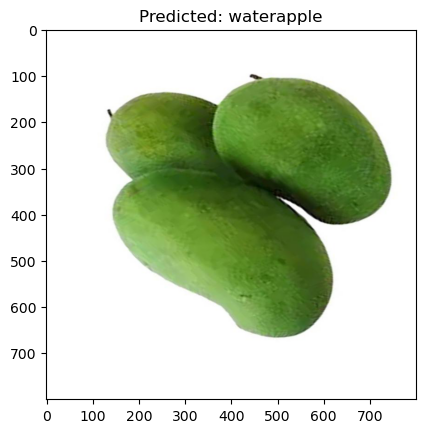

In [34]:
plt.imshow(image.load_img(test_image_path))
plt.title(f"Predicted: {class_labels[predicted_class[0]] if class_labels else predicted_class[0]}")
plt.show()

#Save Model